In [55]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.style as style

from sklearn.decomposition import PCA

In [2]:
# loading the data into a dataframe
m1 = pd.read_csv(r"C:\Users\eadam\Desktop\DSC 630\Homework\Week 4\als_data.csv")

In [3]:
# settiung pd option to display total ouput
pd.set_option("display.max_columns", None)

In [4]:
m1.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.

### 1. Removing any data that isn't relevant to the patient's ALS condition. 

In [5]:
# dropping unneeded columns 
m2 = m1.drop(['ID'], axis=1, inplace=False)

In [6]:
# checking the output of the new dataframe
m2.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.25797

### 2. Apply a standard scaler to the data. 

In [7]:
# creating the scalar
scaler = StandardScaler()

In [9]:
m2_Scaled = scaler.fit_transform(m2)

### 3. Creating a plot of the cluster silhouette score versus the number of clusters in a K-Means cluster.

In [11]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

For n_clusters = 2 The average silhouette_score is : 0.0779489418382482
For n_clusters = 3 The average silhouette_score is : 0.06745061517062359
For n_clusters = 4 The average silhouette_score is : 0.06936441701661918
For n_clusters = 5 The average silhouette_score is : 0.07519380352703203
For n_clusters = 6 The average silhouette_score is : 0.043055945219532404


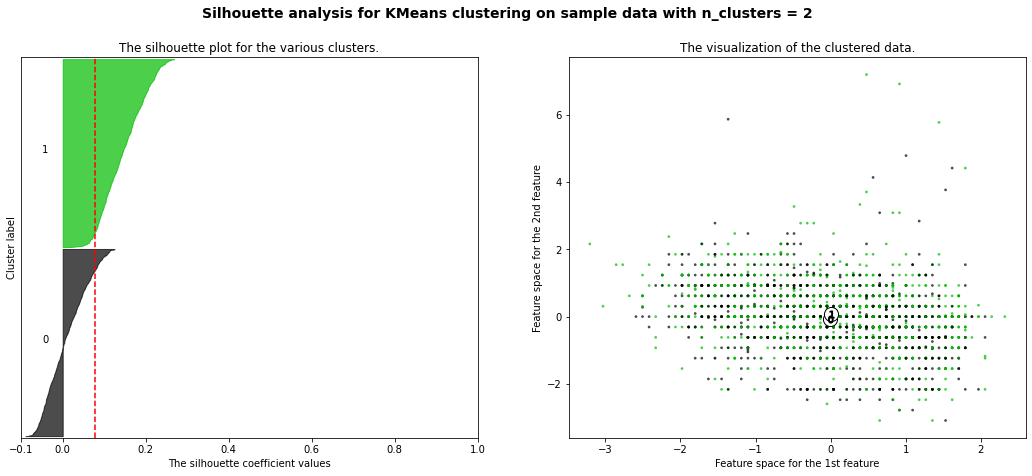

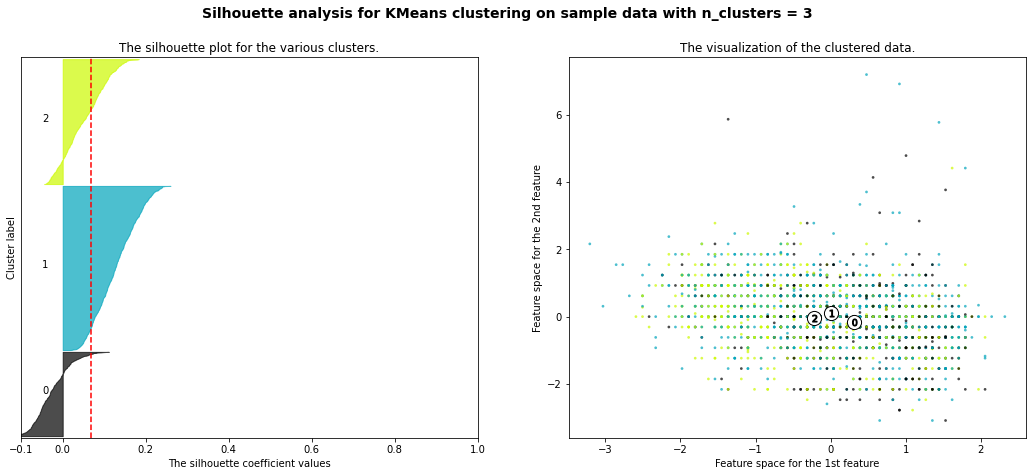

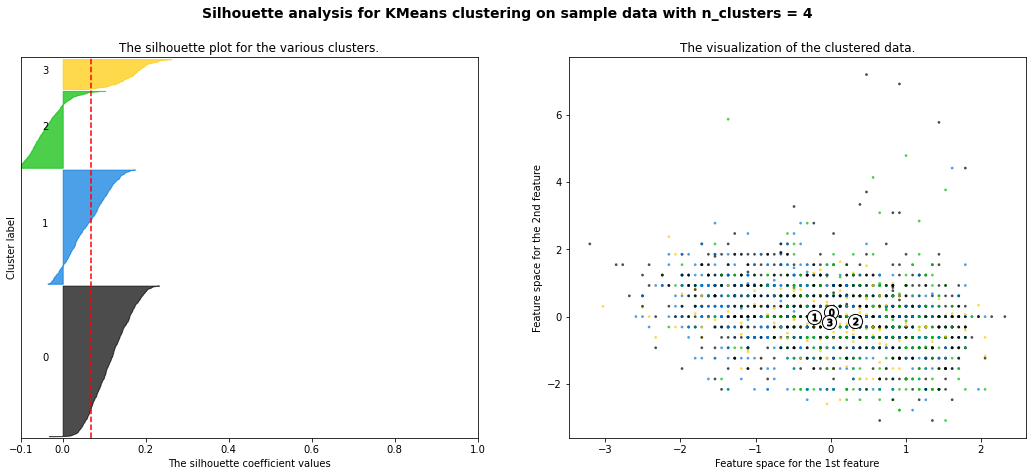

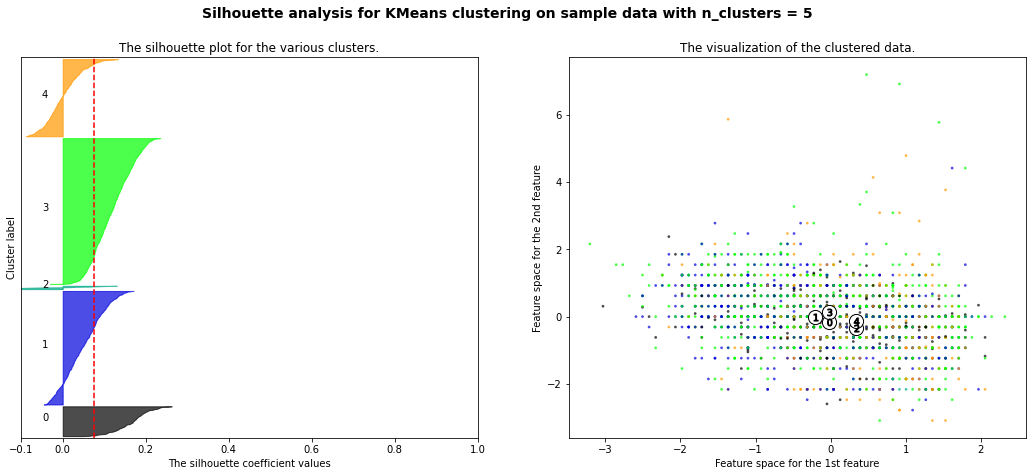

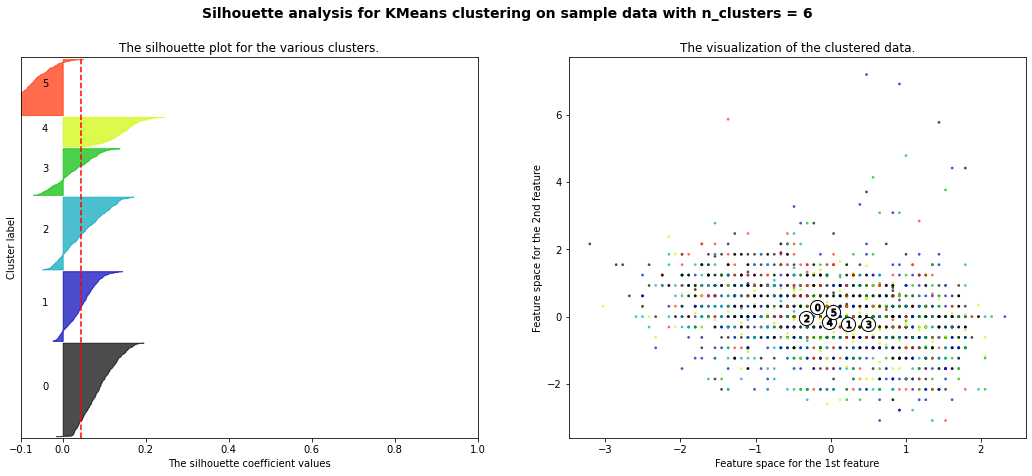

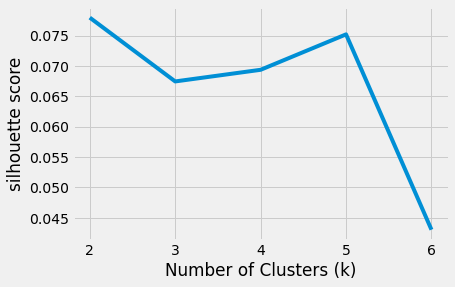

In [24]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(m2_Scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(m2_Scaled)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(m2_Scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(m2_Scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(m2_Scaled[:, 0], m2_Scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### 4. Choosing an optimal number of clusters for K-Means using the plot from Step 3.

I chose to select K=2 for the optimal number of clusters. This K value had the highest silhouette value at 0.078. 

### 5. Fitting a K-Means model to the data with the optimal number of clusters chosen in Step 4. 

In [25]:
# creating a k-mean object
cluster = KMeans(n_clusters=2, random_state=0)

In [80]:
model1 = cluster.fit_transform(m2_Scaled)
model1

array([[12.56591234, 11.80336043],
       [ 8.44682179,  7.3822536 ],
       [ 9.08286834, 10.18825845],
       ...,
       [ 9.31172332,  9.10646881],
       [ 8.62877835,  8.41018006],
       [10.16563035, 10.9556111 ]])

### 6. Fitting a PCA transformation with two features to the scaled data.

In [39]:
pca = PCA(n_components=2, whiten=True)

In [40]:
# conducting PCA
m2_PCA = pca.fit_transform(m2_Scaled)

In [41]:
# showing the results
print("Original Number of Features:", m2_Scaled.shape[1])
print("Reduced number of Features:", m2_PCA.shape[1])

Original Number of Features: 100
Reduced number of Features: 2


In [42]:
pca.explained_variance_ratio_

array([0.11217518, 0.06382155])

### 7. Making a scatterplot of the PCA transformed data coloring each point by its cluster value.

In [59]:
# creating a new dataframe: m3_pca_df
# this dataframe will include the original features and the PCA scores and assigned clusters
m3_pca_df = pd.concat([m2.reset_index(drop=True), pd.DataFrame(m2_PCA)], axis=1)
m3_pca_df.columns.values[-2: ] = ['Component 1', 'Component 2']
m3_pca_df['Segment K-Means PCA'] = model1.labels_

In [60]:
m3_pca_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Component 1,Component 2,Segment K-Means PCA
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0,-0.423197,-0.916650,1
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0,-0.427235,-1.926772,1
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0,0.485524,-0.170471,0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0,-0.570500,0.832430,1
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.

In [61]:
# plotting the data by PCA components
# x-axis is the the second component
x_axis = m3_pca_df['Component 2']

# y-axis is the first component
y_axis = m3_pca_df['Component 1']

C:\Users\eadam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


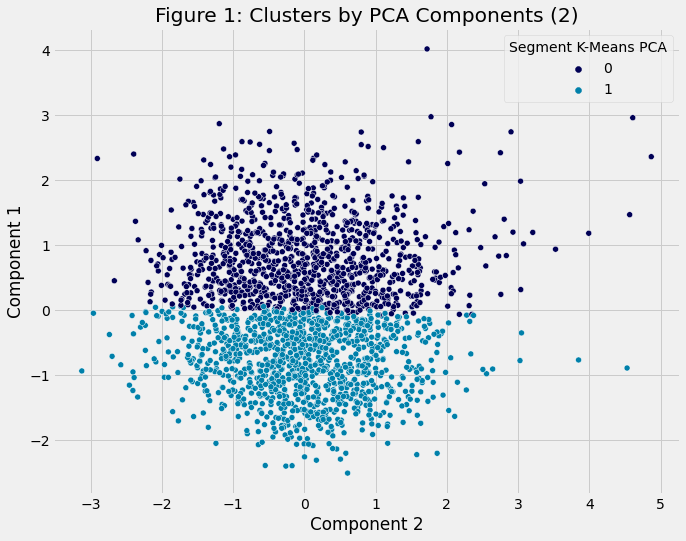

In [83]:
# setting the figure size
plt.figure(figsize = (10, 8))

# creating the PCA visualization
sns.scatterplot(x_axis, y_axis, hue = m3_pca_df['Segment K-Means PCA'], palette = "ocean")
plt.title('Figure 1: Clusters by PCA Components (2)')
plt.show()

### Conclusion

From the PCA component selection, I can see that choosing K=2 was most likely the best option. From step 5, I broke the data into 2 clusters and fit a model using K-Means. After fitting a PCA transformation to the scaled data, I used the created array, model1, as my labels for plotting. I assigned the 'Segment K-Means PCA' to the labels from model1 and based on Figure 1, the labels and the feature selection from the PCA transformation fit near perfectly. 